In [87]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [88]:
#Please insert correct path here
URL = '/content/crop.xlsx'
data = pd.read_excel(URL, header = 0)
print(data)


      NITROGEN  PHOSPHORUS  POTASSIUM  ...        PH    RAINFALL    CROP
0           90          42         43  ...  6.502985  202.935536    rice
1           85          58         41  ...  7.038096  226.655537    rice
2           60          55         44  ...  7.840207  263.964248    rice
3           74          35         40  ...  6.980401  242.864034    rice
4           78          42         42  ...  7.628473  262.717340    rice
...        ...         ...        ...  ...       ...         ...     ...
2195       107          34         32  ...  6.780064  177.774507  coffee
2196        99          15         27  ...  6.086922  127.924610  coffee
2197       118          33         30  ...  6.362608  173.322839  coffee
2198       117          32         34  ...  6.758793  127.175293  coffee
2199       104          18         30  ...  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [89]:
X = data[["NITROGEN","PHOSPHORUS","POTASSIUM","TEMPERATURE","HUMIDITY","PH","RAINFALL"]]
X.head()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [90]:
le = preprocessing.LabelEncoder()
crop = le.fit_transform(list(data["CROP"]))
Y = crop.copy()
Y

array([20, 20, 20, ...,  5,  5,  5])

In [91]:
print(X.shape, Y.shape)

(2200, 7) (2200,)


In [92]:
crop_summary = pd.pivot_table(data,index=['CROP'],aggfunc='mean')
crop_summary.head()

,HUMIDITY,NITROGEN,PH,PHOSPHORUS,POTASSIUM,RAINFALL,TEMPERATURE
CROP,,,,,,,
apple,92.333383,20.80,5.929663,134.22,199.89,112.654779,22.630942
banana,80.358123,100.23,5.983893,82.01,50.05,104.626980,27.376798
blackgram,65.118426,40.02,7.133952,67.47,19.24,67.884151,29.973340
chickpea,16.860439,40.09,7.336957,67.79,79.92,80.058977,18.872847
coconut,94.844272,21.98,5.976562,16.93,30.59,175.686646,27.409892


#Data Visualisation


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


**N, P, K values comparision between crops:**

In [94]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['NITROGEN'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['PHOSPHORUS'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['POTASSIUM'],
    name='Potassium',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [95]:
import plotly.graph_objects as go
z=list(crop_summary.index)
fig = go.Figure(data=[
    go.Bar(name='RAINFALL', x=z, y=crop_summary["RAINFALL"]),
    go.Bar(name='TEMPERATURE', x=z, y=crop_summary["TEMPERATURE"]),
    go.Bar(name='HUMIDITY', x=z, y=crop_summary["HUMIDITY"])
])
# Change the bar mode
fig.update_layout(barmode='stack',title_text="Comparision between rainfall, temerature and humidity",plot_bgcolor='white',height=500)
fig.show()

#Training Model

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [97]:
print(X_train.shape, y_train.shape)

(1650, 7) (1650,)


In [98]:
print(X_test.shape, y_test.shape)

(550, 7) (550,)


#KNN Clissifier


In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [101]:
prediction_knn = model.predict(X_test)



In [102]:
print(accuracy_score(y_test,prediction_knn))

0.9745454545454545


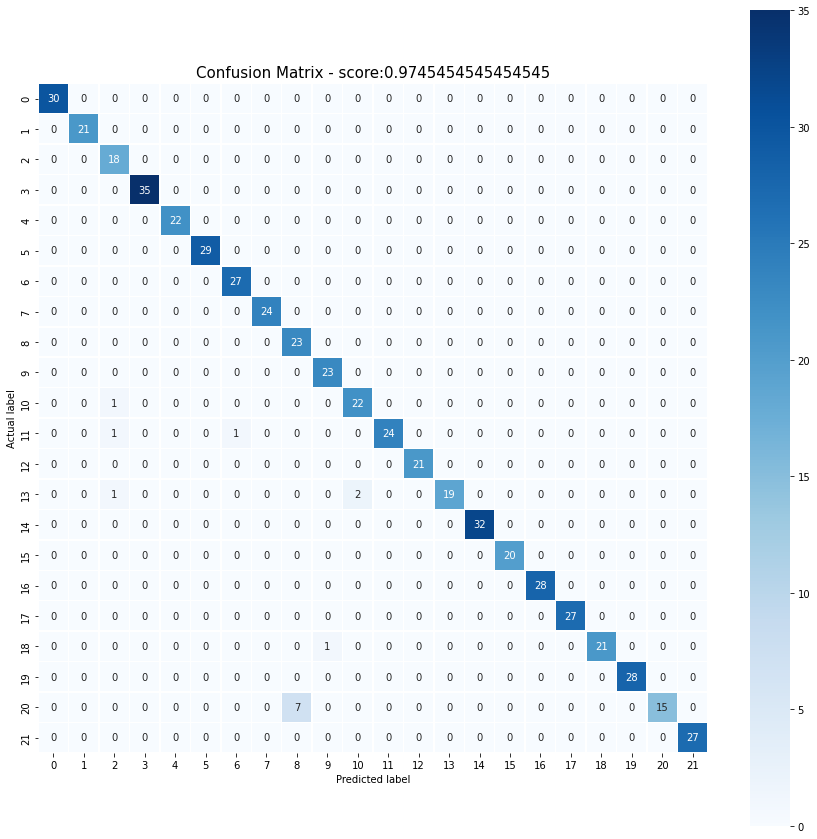

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_knn)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,prediction_knn))
plt.title(all_sample_title, size = 15);
plt.show()

#Saving Model File

In [104]:
import pickle
Pkl_Filename = "Crop_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)